In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
#state space, state 0 is terminal
nbStates = 6 #nincluding terminal states
S=np.arange(nbStates)
pi=0.5*np.ones(nbStates)
gamma=0.9

In [60]:
nbEpisodes = 1000
nbRuns=100

alpha_MC = np.array([0.01,0.02,0.03,0.04,0.05])
alpha_TD = np.array([0.01,0.02,0.03,0.04,0.05])
nbAlpha = np.size(alpha_MC)

In [76]:
#construct P_pi
P_pi=np.diag(0.5*np.ones(nbStates-1),1)+np.diag(0.5*np.ones(nbStates-1),-1)
P_pi[0,0]=1.0
P_pi[0,1]=0.0
P_pi[nbStates-1,0]=0.5

#define r_pi
r_pi = np.zeros(nbStates)
r_pi[nbStates-1]=0.5
r_pi

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0.5])

In [50]:
#v_MC = 0.5*np.ones((nbAlpha, nbRuns, nbEpisodes,nbStates))
v_TD = 0.5*np.ones((nbAlpha, nbRuns, nbEpisodes,nbStates))
v_TD[:,:,:,0]=0.0
#v_MC[:,:,:,0]=0.0

for a in range(nbAlpha):
    for r in range(nbRuns):
        for e in range(1,nbEpisodes):
            #retain values from last episode
            v_TD[a,r,e,:]=v_TD[a,r,e-1,:]
            
            s=3
            while(s>0):
                if(np.random.rand()<pi[s]):
                    #go left
                    v_TD[a,r,e,s] = v_TD[a,r,e,s] + alpha_TD[a]*(0+gamma*v_TD[a,r,e,s-1]-v_TD[a,r,e,s])
                    s-=1
                elif(s==nbStates-1):
                    #go right, episode ends
                    v_TD[a,r,e,s] = v_TD[a,r,e,s] + alpha_TD[a]*(1+gamma*v_TD[a,r,e,0]-v_TD[a,r,e,s])
                    s=0
                else:
                    #go right
                    v_TD[a,r,e,s] = v_TD[a,r,e,s] + alpha_TD[a]*(0+gamma*v_TD[a,r,e,s+1]-v_TD[a,r,e,s])
                    s+=1


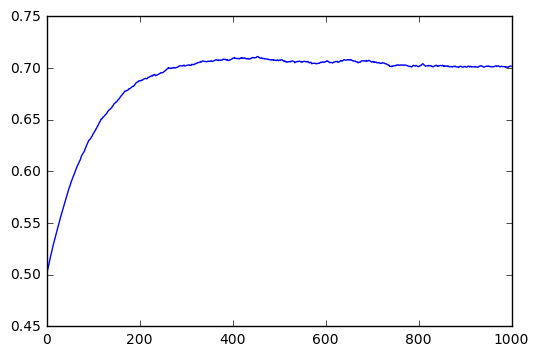

In [46]:
plt.plot(range(nbEpisodes),np.average(v_TD,1)[0,:,5],'-')
plt.show()